In [ ]:
import pandas as pd
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
combined_dataset = pd.read_csv('/content/drive//My Drive/combined_dataset.csv')

In [ ]:
combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201936 entries, 0 to 201935
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   German   201795 non-null  object
 1   English  201936 non-null  object
dtypes: object(2)
memory usage: 3.1+ MB


In [ ]:
# Observing the shape of merged dataframes

combined_dataset.shape

(201936, 2)

In [ ]:
# Observing the top 5 entries of merged dataframe

combined_dataset.head()

,German,English
0,Steigt Gold auf 10.000 Dollar?\n,"$10,000 Gold?\n"
1,"SAN FRANCISCO – Es war noch nie leicht, ein ra...",SAN FRANCISCO – It has never been easy to have...
2,In letzter Zeit allerdings ist dies schwierige...,"Lately, with gold prices up more than 300% ove..."
3,Erst letzten Dezember verfassten meine Kollege...,"Just last December, fellow economists Martin F..."
4,"Und es kam, wie es kommen musste.\n",Wouldn’t you know it?\n


In [ ]:
# Dropping the null values from the dataframe

combined_dataset.dropna()

,German,English
0,Steigt Gold auf 10.000 Dollar?\n,"$10,000 Gold?\n"
1,"SAN FRANCISCO – Es war noch nie leicht, ein ra...",SAN FRANCISCO – It has never been easy to have...
2,In letzter Zeit allerdings ist dies schwierige...,"Lately, with gold prices up more than 300% ove..."
3,Erst letzten Dezember verfassten meine Kollege...,"Just last December, fellow economists Martin F..."
4,"Und es kam, wie es kommen musste.\n",Wouldn’t you know it?\n
...,...,...
201790,Das bleibt eine der größten Errungenschaften i...,It didn’t have to be this way.\n
201791,Gleichzeitig scheint sich Zumas revolutionäre ...,This past year has seen one missed opportunity...
201792,"In einer Region, wo die älteren Menschen sehr ...",South African president Thabo Mbeki convened n...
201793,Drei von zehn Südafrikanern sind jünger als 15...,Some African leaders – notably Ghana’s preside...


In [ ]:
# Dropping the duplicates from the dataframe

combined_dataset = combined_dataset.drop_duplicates()

In [ ]:
# Observing shape of the dataframe after dropping null values and duplicates

combined_dataset.shape

(201936, 2)

In [ ]:
# Randomly sample 5% of dataframe

combined_dataset_sample = combined_dataset.sample(frac = 0.1)

In [ ]:
# Observing the shape of sampled dataframe

combined_dataset_sample.shape

(20194, 2)

In [ ]:
# Adding columns in the dataframe which shows the length of each English and German sentence

combined_dataset_sample['eng_length'] = combined_dataset_sample['English'].str.len()

combined_dataset_sample['ger_length'] = combined_dataset_sample['German'].str.len()

In [ ]:
# Observing the information of sampled dataframe

combined_dataset_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20194 entries, 116498 to 83253
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   German      20183 non-null  object 
 1   English     20194 non-null  object 
 2   eng_length  20194 non-null  int64  
 3   ger_length  20183 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 788.8+ KB


In [ ]:
# Observing top 5 entries of the sampled dataframe

combined_dataset_sample.head(5)

,German,English,eng_length,ger_length
116498,"Weisberg scheint nicht nach einem mickrigen ,,...","As is frequently pointed out, unless banking r...",147,139.0
41809,Schäden an der Stromversorgung hüllten ein Dri...,Was it always thus?\n,20,104.0
107817,Das wichtigste Ziel der neuen Ministerpräsiden...,Post-American Israel\n,21,130.0
113072,Ihre Argumentation lautet: Da die Zukunft unsi...,Obviously the European Commission can play a p...,223,409.0
112876,Die Leser müssen zwangsläufig zu dem Schluss k...,"He has strong political skills, and, coming fr...",149,133.0


In [ ]:
def clean_sentence(sentence):
    sentence = sentence.lower()  #Convert to lowercase
    sentence = re.sub(r'\s+', ' ', sentence)  # Remove new line character
    sentence = sentence.strip()  # Remove leading and trailing white spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Replace multiple spaces with a single space
    sentence = re.sub(r'[^\w\s.,!?\'"]', '', sentence)  # Remove special characters except common punctuation
    sentence = 'START_ '+ sentence + ' _END'
    return sentence

In [ ]:
# Calling process_data function on the sampled dataframe

combined_dataset_sample['German'] = combined_dataset_sample['German'].astype(str).apply(clean_sentence)

In [ ]:
combined_dataset_sample['English'] = combined_dataset_sample['English'].astype(str).apply(clean_sentence)

In [ ]:
# Observing top 5 entries of the processed dataframe

combined_dataset_sample.head(5)

,German,English,eng_length,ger_length
116498,START_ weisberg scheint nicht nach einem mickr...,"START_ as is frequently pointed out, unless ba...",147,139.0
41809,START_ schäden an der stromversorgung hüllten ...,START_ was it always thus? _END,20,104.0
107817,START_ das wichtigste ziel der neuen ministerp...,START_ postamerican israel _END,21,130.0
113072,START_ ihre argumentation lautet da die zukunf...,START_ obviously the european commission can p...,223,409.0
112876,START_ die leser müssen zwangsläufig zu dem sc...,"START_ he has strong political skills, and, co...",149,133.0


Pre Processing - Dataset suitable to be used for AIML model learning

In [ ]:
# Function to generate word tokens
from tensorflow.keras.preprocessing.text import Tokenizer

def tokenize(sentences):
    # Create tokenizer
    text_tokenizer = Tokenizer()

    # Fit texts
    text_tokenizer.fit_on_texts(sentences)
    return text_tokenizer.texts_to_sequences(sentences), text_tokenizer

In [ ]:
# Generate word index

eng_tokenized, eng_tokenizer = tokenize(combined_dataset_sample['English'])
ger_tokenized, ger_tokenizer = tokenize(combined_dataset_sample['German'])

eng_word_index = eng_tokenizer.word_index
ger_word_index = ger_tokenizer.word_index

In [ ]:
# Finding the vocabulary size with number of unique tokens

english_vocab = len(eng_tokenizer.word_index) + 1
german_vocab = len(ger_tokenizer.word_index) + 1

print("English vocabulary is of {} unique words".format(english_vocab))
print("german vocabulary is of {} unique words".format(german_vocab))

English vocabulary is of 25378 unique words
german vocabulary is of 43724 unique words


In [ ]:
# Define the parameters

maxlen_eng = int(len(max(eng_tokenized, key=len)))
maxlen_ger = int(len(max(ger_tokenized, key=len)))

print("Maximum Length of English tokens is {}".format(maxlen_eng))
print("Maximum Length of German tokens is {}".format(maxlen_ger))

Maximum Length of English tokens is 102
Maximum Length of German tokens is 115


In [ ]:
# Generate token sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
eng_pad_sentence = pad_sequences(eng_tokenized, maxlen_eng, padding = "post")
ger_pad_sentence = pad_sequences(ger_tokenized, maxlen_ger, padding = "post")

print('Number of English Samples are {}:', len(eng_pad_sentence))
print('Number of German Samples are {}:', len(ger_pad_sentence))

Number of English Samples are {}: 20194
Number of German Samples are {}: 20194


Model Design

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(eng_pad_sentence,ger_pad_sentence,test_size=0.25,shuffle=True,random_state=101)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(15145, 102)
(5049, 102)
(15145, 115)
(5049, 115)


In [ ]:
from tensorflow.keras.layers import Dense, LSTM, Input, Embedding, Activation, RepeatVector, Dropout, BatchNormalization, Flatten, Bidirectional, TimeDistributed, SimpleRNN
from tensorflow.keras.models import Model, Sequential

In [ ]:
# Designing the basic LSTM model

model_translate_lstm = Sequential()

model_translate_lstm.add(Embedding(input_dim = english_vocab, output_dim = 128,input_shape=(maxlen_eng,), trainable = False))

model_translate_lstm.add(LSTM(64, return_sequences=False))

model_translate_lstm.add(RepeatVector(maxlen_ger))

model_translate_lstm.add(LSTM(64, return_sequences=True, dropout=0.2))

model_translate_lstm.add(TimeDistributed(Dense(1000)))

model_translate_lstm.add(Dense(1000,activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
rms = RMSprop(learning_rate=0.001)
model_translate_lstm.compile(loss=sparse_categorical_crossentropy, optimizer=rms, metrics=['accuracy'])

In [ ]:
model_translate_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 102, 128)            │       3,248,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_1 (RepeatVector)       │ (None, 115, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 115, 64)             │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 115, 1000)           │          65,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 115, 1000)           │       1,001,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,396,816 (16.77 MB)

 Trainable params: 1,148,432 (4.38 MB)

 Non-trainable params: 3,248,384 (12.39 MB)

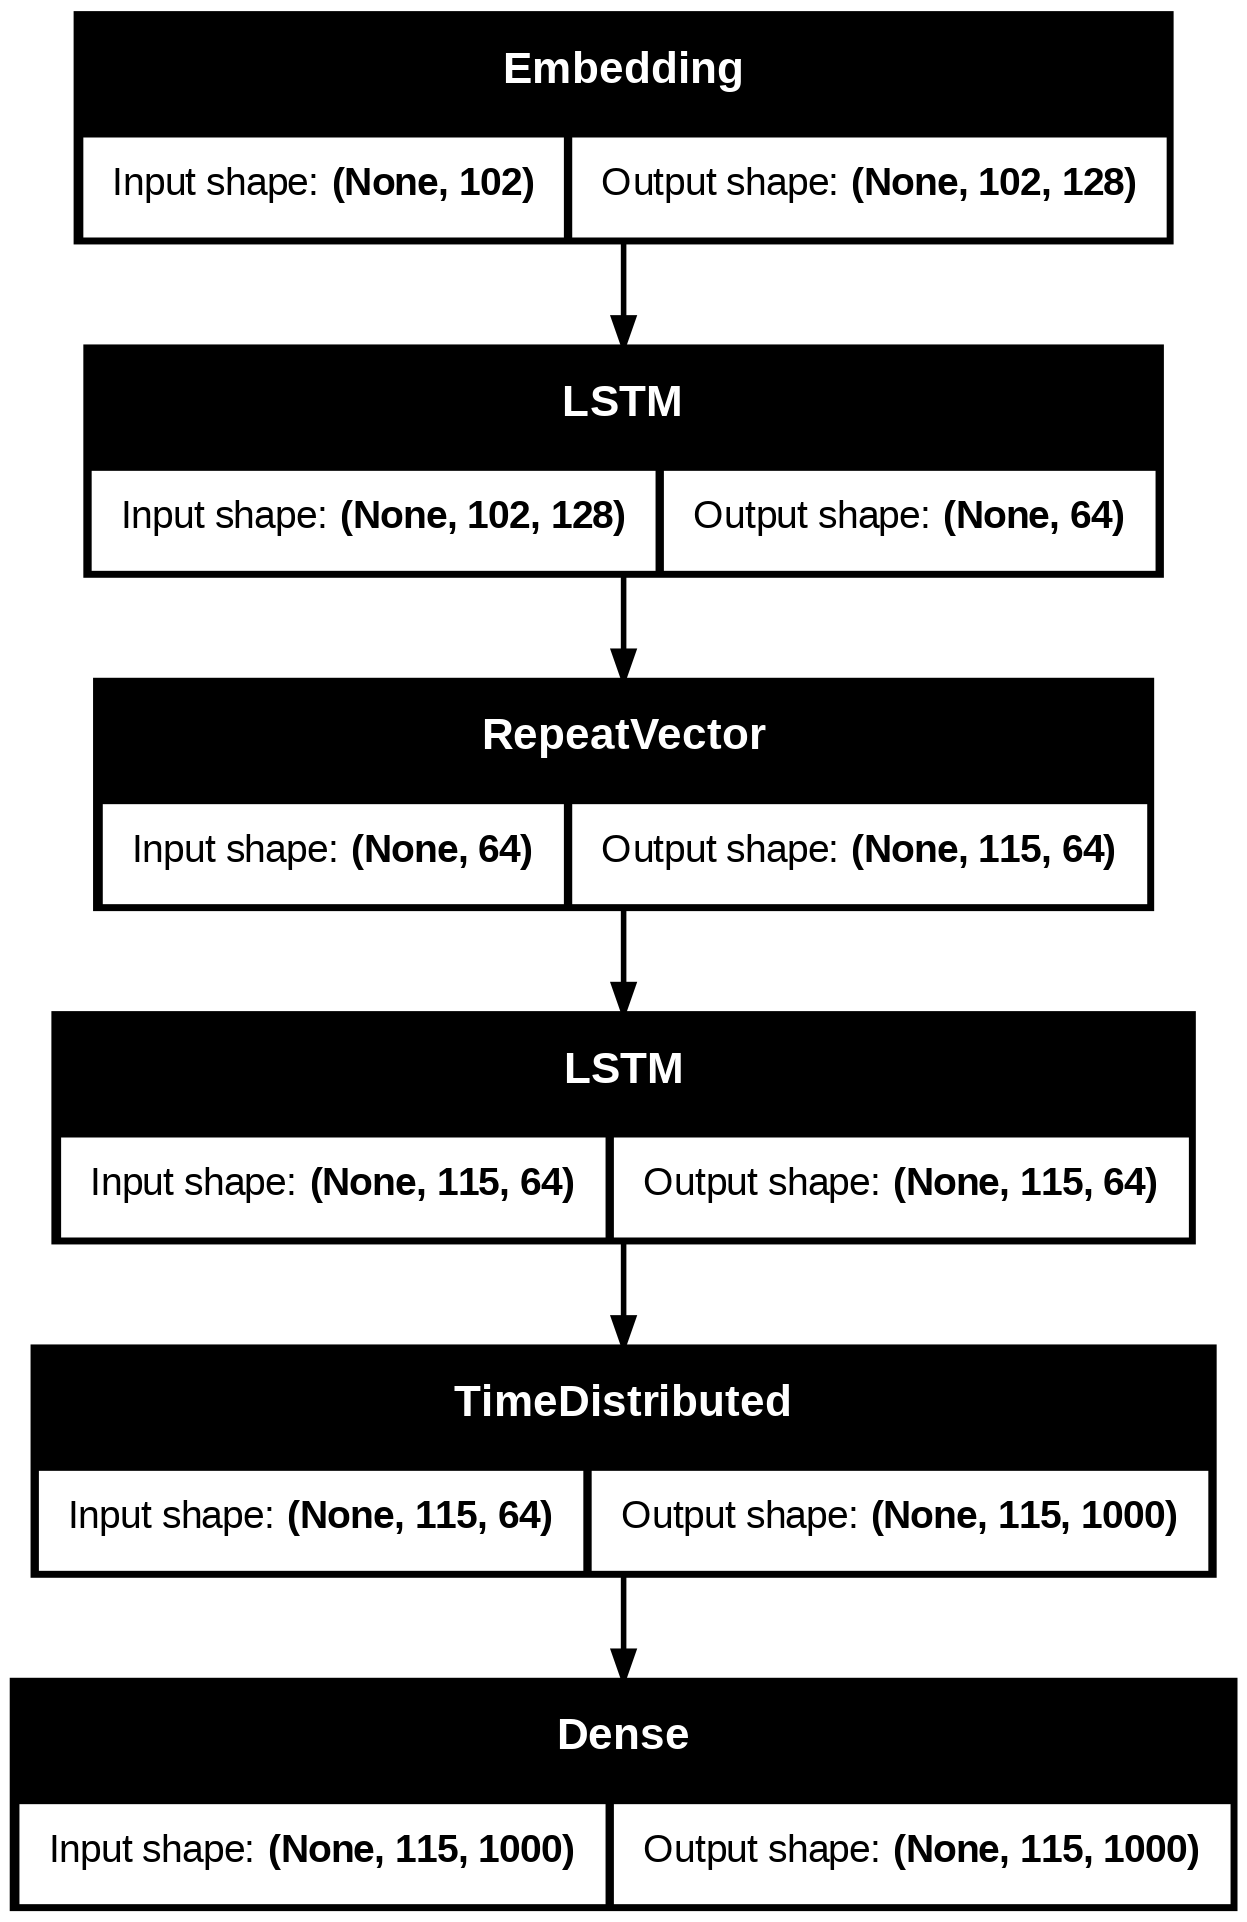

In [ ]:
from keras.utils import plot_model
plot_model(model_translate_lstm, to_file='model.png', show_shapes=True)

In [ ]:

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
checkpoint_filepath = '/checkpoint.model.keras'
es = EarlyStopping(monitor='val_accuracy',mode='max',verbose=1,patience=40)
rl = ReduceLROnPlateau(monitor='val_accuracy',mode='max',verbose=1,patience=5,factor=0.1,min_lr=0.001)
mc = ModelCheckpoint(checkpoint_filepath,monitor='val_accuracy',verbose=1,mode='max',save_best_only=True)

In [ ]:
history = model_translate_lstm.fit(X_train, Y_train,validation_data=(X_test, Y_test), epochs = 30, batch_size = 32)

Epoch 1/30


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-45-b293cca6db65>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 318, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 357, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 325, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 609, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 645, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 43, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1853, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1567, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 645, in sparse_categorical_crossentropy

Received a label value of 43390 which is outside the valid range of [0, 1000).  Label values: 2 1117 1624 51 4361 9 14849 166 12 2693 28055 4 2804 5 12 451 28056 3123 28 257 5 67 673 3459 26 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 40 12078 37 1 448 16 654 658 67 30 36 16 6184 26 327 15 24 1868 2120 306 309 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 451 9728 18 250 11 15 178 30 1 15754 1566 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 53 234 180 49 25 7309 2986 3647 67 27 1 171 5827 456 184 4 4794 21 847 9959 7842 144 257 224 53 13 23 25 43076 4 305 23 46 43077 8 43078 43 5114 18 10 7044 5 1 2927 17 9073 2477 84 43079 4 21 13396 12764 1969 21 847 66 290 97 49 25 2986 3602 1802 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 16508 55 4879 26 24 28099 66 718 28100 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 4 1986 42 1 3145 7 1049 35152 742 11 123 16 73 25 865 5 25 9 8 3335 3935 35153 35154 7 1583 106 184 4 566 1056 408 4 35155 148 13 12095 6361 1582 5 9888 2456 5780 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 36 19 9979 42247 68 13897 5 54 10498 23 25 437 13655 410 14 42248 772 9727 4832 21 1085 7 389 21 127 785 7 6007 79 53 23 2180 99 1437 51 83 2817 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 72 28 12710 1919 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 5 10 11 30 1491 45 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 81 559 125 1296 6 8 129 194 5 165 6 4 2193 4 261 658 82 275 1798 20 30 13 10358 1242 2115 26 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 39 218 911 18 1 3413 9 6459 91 625 5 488 33 19 45 15541 1374 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 3157 37 150 1 118 1498 4 1038 5 2904 5722 3329 50 359 679 67 263 173 4849 8 502 824 110 7840 15051 9310 7 1143 81 80 1 759 9311 23986 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 6 8 2255 3538 249 399 88 2854 51 743 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 587 777 51 702 17 626 8413 139 537 10 1245 3194 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 177 219 19 29 118 276 58 466 5 12 17661 83 5 55 16 29 626 3453 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 196 113 7526 4899 11 19 257 4715 43390 7 9024 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 29 10 291 38165 7 287 102 19 12 3509 311 1 1391 3634 5 165 416 1 3136 539 28 29 47 208 2020 7 666 38 9907 539 29 22 9529 832 7 1353 9 4 16825 4073 49 25 2038 69 38166 38167 1 6271 69 15111 38168 8452 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 21 1564 3879 73 3166 5 2323 62 4468 52 944 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 16 1824 737 73 78 5 4 261 1868 8075 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 153 170 6480 41 4953 2837 51 26814 21 11878 13277 26815 4353 915 5398 277 124 61 967 71 15 24 47 208 194 16 733 2537 67 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 4 17205 2740 4 30272 7322 21 1908 1350 132 1 225 333 49 13 30273 2947 1189 30274 66 30275 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 72 11 22 2700 3112 226 1 63 678 12 4908 381 74 8 665 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 27 39 117 1 2165 586 9 8 20102 4258 26 29 40 246 461 7 352 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 91 194 13020 22 5072 186 22 18341 4 13855 10 17860 7 1191 3755 103 13 18342 5 634 16409 1379 71 47 2518 35760 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 8242 34 200 5608 44 968 5259 6244 57 4 2067 23 6327 33864 16 1757 12015 12623 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 896 62 5 102 140 22 435 32 176 827 37 64 27 109 89 30 101 19 13 176 410 1923 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 35017 112 7392 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 10 101 13 132 5796 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 36 40 1692 27 2894 1305 101 4 2149 41 2844 382 8 1 271 105 14449 957 20 690 51 4734 9 8731 1014 67 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 53 1726 279 32 1 45 1458 42464 4 128 755 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 4 254 584 828 1280 361 5 1810 27 40 2478 522 15 50 6 13430 628 4619 382 67 29 1835 228 7 1512 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 21 553 110 18940 4 540 42442 42443 48 78 60 158 5586 15 1 2758 17 6645 6 78 23 6947 10919 172 8 59 1164 11 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_27936]